In [217]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
sns.set_style("darkgrid")

Функции для построения характеристик

In [218]:
def char1(x):
    return [((1 + np.cos(0.5 * np.pi * x0)) *
             (x0 - x)) for x0 in np.arange(-1, 0.1, 0.1)]

def char2(x):
    return [((1 + np.exp(-t0)) * (-x) 
             + t0) for t0 in np.arange(0, 1.1, 0.1)]

Построим характеристики для поиска пересечений

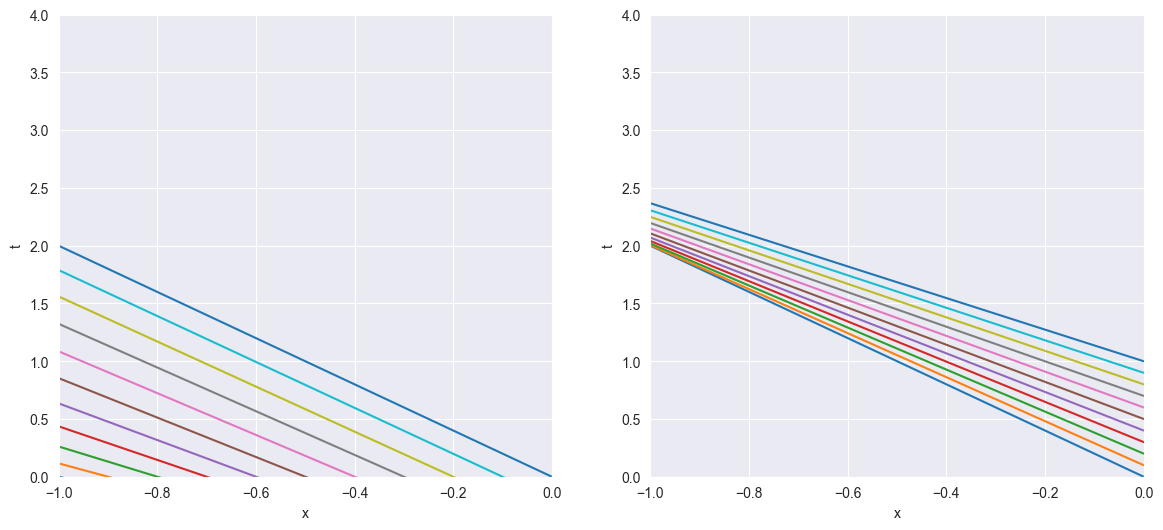

In [219]:
x = np.arange(-1, 0.1, 0.1)
char1_list = [char1(i) for i in x]
char2_list = [char2(i) for i in x]

fig, axs = plt.subplots(1, 2, figsize=(14,6))
axs[0].set_ylim(0, 4)
axs[0].set_xlim(-1, 0)
axs[0].plot(x, char1_list)
axs[0].set_ylabel('t')
axs[0].set_xlabel('x')

axs[1].set_ylim(0, 4)
axs[1].set_xlim(-1, 0)
axs[1].plot(x, char2_list)
axs[1].set_ylabel('t')
axs[1].set_xlabel('x')

fig.savefig("chars.png")

Вспомогательные константы, массивы для x, y, t и разностной сетки

In [220]:
epsilon = 0.00001

N, M = 100, 100
T_0, T_1 = 0, 1
X_0, X_1 = 0, -1

h_x = (X_1 - X_0) / (N - 1)
h_t = (T_1 - T_0) / (M - 1)
y = np.zeros((M, N))

In [221]:
for n in np.arange(N):
        y[0][n] = np.cos(0.5 * np.pi * h_x * n)

for m in np.arange(M):
        y[m][0] = np.exp(-h_t * m)

Вспомогательные функции

In [222]:
def F(m, n):
    return np.log(y[m][n] + 1)

def df(mp1, np1):
    return 1 / (2 * h_t) - 0.5 / (h_x * (y[mp1][np1] + 1))

def f(mp1, np1):
    n = np1 - 1
    m = mp1 - 1
    return (y[mp1][n] - y[m][n] + y[mp1][np1] - y[m][np1]) / \
        (2.0 * h_t) - (F(mp1, np1) - F(mp1, n) + F(m, np1) - F(m,n)) / (2.0 * h_x)

In [223]:
for m in np.arange(M - 1):
        for n in np.arange(N - 1):
            eps = epsilon + 1
            
            while eps > epsilon:
                ep = f(m + 1, n + 1) / df(m + 1, n + 1)
                y[m + 1][n + 1] = y[m + 1][n + 1] - ep
                eps = abs(ep)

Отобразим решение графически

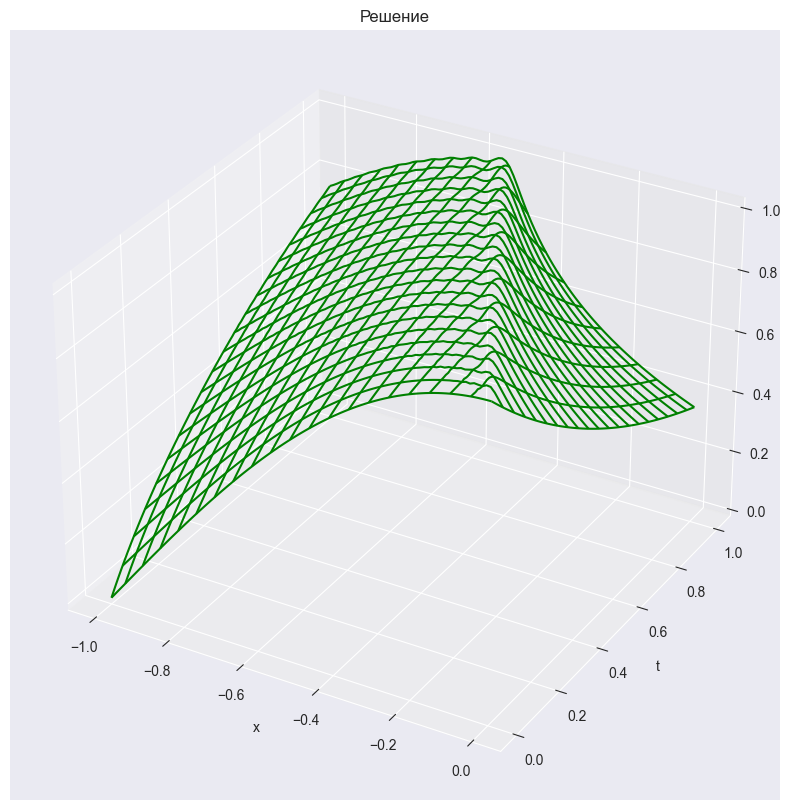

In [224]:
tm = np.linspace(T_0,T_1, num=M)
xn = np.linspace(X_0, X_1, num=N)
X, T = np.meshgrid(xn, tm)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, y, rstride=5, cstride=5, color="green")

plt.title('Решение')
plt.xlabel('x')
plt.ylabel('t')
plt.savefig("result.png")


MovieWriter ffmpeg unavailable; using Pillow instead.


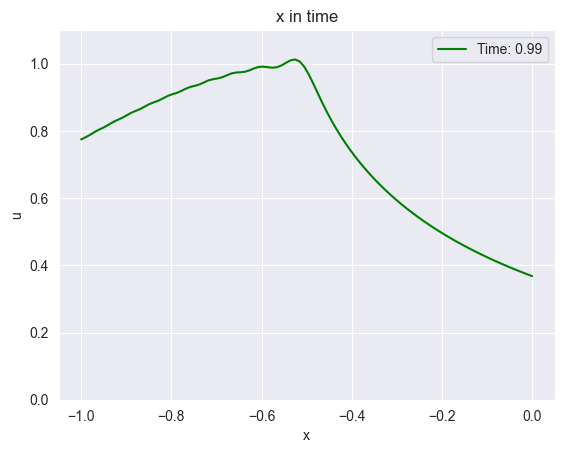

In [225]:
fig, ax = plt.subplots()
line, = ax.plot(xn, y[0][:], color="g", label="Time: 0")
ax.set_title("x in time")
ax.set_ylim(0, 1.1)
ax.set_xlim(-1.05, 0.05)
ax.set_xlabel("x")
ax.set_ylabel("u")
L = ax.legend(loc=1)

def animate(i):
    L.get_texts()[0].set_text(f"Time: {i/M:.2f}")
    line.set_ydata(y[i][:])
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=1, blit=True, save_count=M)

ani.save("ux_in_time.gif")

Погрешности

In [226]:
# x = -0,8; t = 0.8
for i in np.arange(-1, 5, 0.00001):
    if abs(0.8 - (i+0.8)*(1+np.cos(np.pi*i/2))) < 0.001:
        x0 = i
        break

err0_8 = abs(np.cos(np.pi*x0/2) - y[int(0.8*M)][int(0.8*N)]) / y[int(0.8*M)][int(0.8*N)]

In [227]:
# x = -0.5; t = 0.5
for i in np.arange(-1, 5, 0.00001):
    if abs(0.5 - (i+0.5)*(1+np.cos(np.pi*i/2))) < 0.001:
        x0 = i
        break
    
err0_5 = abs(np.cos(np.pi*x0/2) - y[int(0.5*M)][int(0.5*N)]) / y[int(0.5*M)][int(0.5*N)]

In [228]:
# x = -0.5; t = 0.5
for i in np.arange(-1, 5, 0.00001):
    if abs(0.7 - (i+0.7)*(1+np.cos(np.pi*i/2))) < 0.001:
        x0 = i
        break
err0_7 = abs(np.cos(np.pi*x0/2) - y[int(0.7*M)][int(0.7*N)]) / y[int(0.7*M)][int(0.7*N)]

In [229]:
err_avg = (err0_5+err0_7+err0_8)/3
with open("errors.txt", 'a') as f:
    f.write(f"average error with N={N}, M={M}, eps={epsilon} is {err_avg}\n")